<a href="https://colab.research.google.com/github/luck058/kaggle-gold-price-analysis/blob/model-1/model_1_kaggle_gold_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [189]:
!git clone https://github.com/luck058/kaggle-gold-price-analysis

%cd kaggle-gold-price-analysis

Cloning into 'kaggle-gold-price-analysis'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 55 (delta 28), reused 20 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (55/55), 1.25 MiB | 14.23 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis/kaggle-gold-price-analysis


# Create X, y

In [190]:
df = pd.read_csv('financial_regression_cleaned.csv')

# Only care about sp500
original_cols = ['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume', 'sp500 high-low']
df = df[original_cols].reset_index(drop=True)

display(df.head())
print(df.shape)

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low
0,114.49,115.14,114.42,114.93,115646960.0,0.72
1,114.73,114.84,113.20,113.64,212252769.0,1.64
2,113.62,115.13,113.59,115.06,138671890.0,1.54
3,114.28,114.45,112.98,113.89,216330645.0,1.47
4,113.92,114.27,111.56,111.70,344747028.0,2.71


(3719, 6)


In [191]:
df["sp500 close diff"] = df["sp500 close"].diff()

display(df.head())
print(df.shape)

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,sp500 close diff
0,114.49,115.14,114.42,114.93,115646960.0,0.72,NaN
1,114.73,114.84,113.20,113.64,212252769.0,1.64,-1.29
2,113.62,115.13,113.59,115.06,138671890.0,1.54,1.42
3,114.28,114.45,112.98,113.89,216330645.0,1.47,-1.17
4,113.92,114.27,111.56,111.70,344747028.0,2.71,-2.19


(3719, 7)


In [192]:
def create_lag(df, column, lookback):
    assert column in df.columns
    for lag in range(1, lookback):
        if np.log2(lag) % 1 == 0:
            df[f'{column}-{lag}'] = df[column].shift(lag)

In [193]:
create_lag(df, 'sp500 close diff', 10)
display(df.head())

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,sp500 close diff,sp500 close diff-1,sp500 close diff-2,sp500 close diff-4,sp500 close diff-8
0,114.49,115.14,114.42,114.93,115646960.0,0.72,NaN,NaN,NaN,NaN,NaN
1,114.73,114.84,113.20,113.64,212252769.0,1.64,-1.29,NaN,NaN,NaN,NaN
2,113.62,115.13,113.59,115.06,138671890.0,1.54,1.42,-1.29,NaN,NaN,NaN
3,114.28,114.45,112.98,113.89,216330645.0,1.47,-1.17,1.42,-1.29,NaN,NaN
4,113.92,114.27,111.56,111.70,344747028.0,2.71,-2.19,-1.17,1.42,NaN,NaN


In [194]:
def get_max(df, column, lookback, name_append=None):
    assert column in df.columns
    df[f'{column}-max{name_append}'] = df[column].rolling(lookback).max()

In [195]:
def get_min(df, column, lookback, name_append=None):
    assert column in df.columns
    df[f'{column}-min{name_append}'] = df[column].rolling(lookback).min()

In [196]:
def get_min_max(df, column, lookback, name_append=None):
    assert column in df.columns
    get_max(df, column, lookback, name_append=name_append)
    get_min(df, column, lookback, name_append=name_append)

In [197]:
for column in original_cols + ["sp500 close diff"]:
    get_min_max(df, column, 5, "-short")


In [198]:
for column in original_cols + ["sp500 close diff"]:
    get_min_max(df, column, 20, "-long")


In [199]:
def get_mean(df, column, lookback, name_append=None):
    assert column in df.columns
    df[f'{column}-mean{name_append}'] = df[column].rolling(lookback).mean()

In [200]:
for column in original_cols + ["sp500 close diff"]:
    get_min_max(df, column, 5, "-short")

In [201]:
for column in original_cols + ["sp500 close diff"]:
    get_min_max(df, column, 20, "-long")

## Create y

In [202]:
y_col = "sp500 close diff"

df[y_col] = df[y_col].shift(-1)
df = df.dropna(axis=0).reset_index(drop=True)

display(df.head())

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,sp500 close diff,sp500 close diff-1,sp500 close diff-2,sp500 close diff-4,...,sp500 low-max-long,sp500 low-min-long,sp500 close-max-long,sp500 close-min-long,sp500 volume-max-long,sp500 volume-min-long,sp500 high-low-max-long,sp500 high-low-min-long,sp500 close diff-max-long,sp500 close diff-min-long
0,106.99,108.10,106.51,108.04,304335521.0,1.59,1.70,1.12,-0.21,-0.77,...,113.59,104.58,115.06,105.89,493483874.0,138671890.0,2.71,0.97,1.67,-3.39
1,108.86,109.85,107.82,109.74,159025359.0,2.03,0.52,-0.09,1.12,1.33,...,113.59,104.58,115.06,105.89,493483874.0,138671890.0,2.71,0.97,1.70,-3.39
2,110.27,110.41,109.74,110.26,168609976.0,0.67,0.65,1.70,-0.09,-0.21,...,112.98,104.58,113.89,105.89,493483874.0,159025359.0,2.71,0.67,1.70,-3.39
3,110.08,111.14,110.04,110.91,192806015.0,1.10,0.23,0.52,1.70,1.12,...,111.56,104.58,111.70,105.89,493483874.0,159025359.0,2.71,0.67,1.70,-3.39
4,110.62,111.57,110.36,111.14,215567204.0,1.21,0.02,0.65,0.52,-0.09,...,110.36,104.58,111.14,105.89,493483874.0,159025359.0,2.65,0.67,1.70,-3.39


In [203]:
y = df[y_col]
X = df.drop(y_col, axis=1)

print("y:")
display(pd.Series(y).head())
print("X:")
display(X.head())

print("len(y):")
print(len(y))
print("X.shape:")
print(X.shape)

y:


,sp500 close diff
0,1.70
1,0.52
2,0.65
3,0.23
4,0.02


X:


,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,sp500 close diff-1,sp500 close diff-2,sp500 close diff-4,sp500 close diff-8,...,sp500 low-max-long,sp500 low-min-long,sp500 close-max-long,sp500 close-min-long,sp500 volume-max-long,sp500 volume-min-long,sp500 high-low-max-long,sp500 high-low-min-long,sp500 close diff-max-long,sp500 close diff-min-long
0,106.99,108.10,106.51,108.04,304335521.0,1.59,1.12,-0.21,-0.77,1.32,...,113.59,104.58,115.06,105.89,493483874.0,138671890.0,2.71,0.97,1.67,-3.39
1,108.86,109.85,107.82,109.74,159025359.0,2.03,-0.09,1.12,1.33,-0.55,...,113.59,104.58,115.06,105.89,493483874.0,138671890.0,2.71,0.97,1.70,-3.39
2,110.27,110.41,109.74,110.26,168609976.0,0.67,1.70,-0.09,-0.21,-3.39,...,112.98,104.58,113.89,105.89,493483874.0,159025359.0,2.71,0.67,1.70,-3.39
3,110.08,111.14,110.04,110.91,192806015.0,1.10,0.52,1.70,1.12,0.22,...,111.56,104.58,111.70,105.89,493483874.0,159025359.0,2.71,0.67,1.70,-3.39
4,110.62,111.57,110.36,111.14,215567204.0,1.21,0.65,0.52,-0.09,-0.77,...,110.36,104.58,111.14,105.89,493483874.0,159025359.0,2.65,0.67,1.70,-3.39


len(y):
3698
X.shape:
(3698, 38)


# Models

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_validate


X_train.shape: (3328, 38)
X_test.shape: (370, 38)
y_train.shape: (3328,)
y_test.shape: (370,)
y_class_train.shape: (3328,)
y_class_test.shape: (370,)


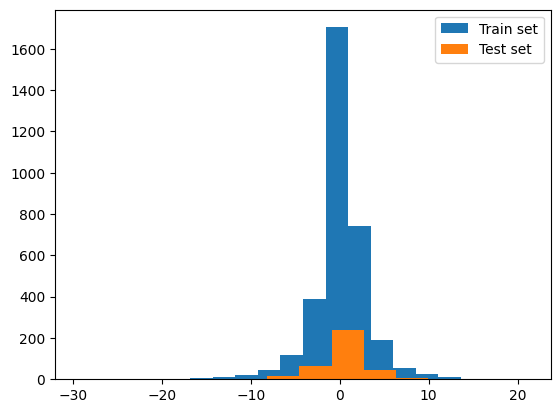

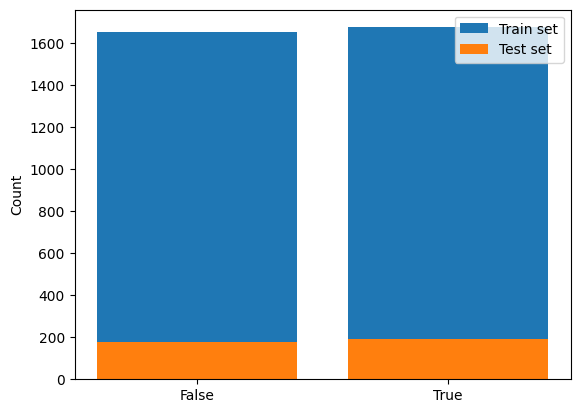

In [205]:
np.random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
y_class_train = y_train > y_train.mean()
y_class_test = y_test > y_train.mean()

scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)
print("y_class_train.shape:", y_class_train.shape)
print("y_class_test.shape:", y_class_test.shape)

plt.hist(y_train, bins=20, label="Train set")
plt.hist(y_test, bins=10, label="Test set")
plt.legend()
plt.show()

plt.bar([0, 1], [len(y_class_train) - y_class_train.sum(), y_class_train.sum()], label="Train set")
plt.bar([0, 1], [len(y_class_test) - y_class_test.sum(), y_class_test.sum()], label="Test set")
plt.xticks([0, 1], ["False", "True"])
plt.ylabel("Count")
plt.legend()
plt.show()

In [206]:
class PredictZero:
    """Model which just predicts y as 0 irrespective of X"""
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.zeros(len(X))

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def get_params(self, deep=True):
        return {}

In [207]:
class PredictOne:
    """Model which just predicts y as 0 irrespective of X"""
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.ones(len(X))

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def get_params(self, deep=True):
        return {}

In [208]:
class PredictMean:
    """Model which just predicts y as the mean of y in the training set irrespective of X"""
    def fit(self, X, y):
        self.mean_y = np.mean(y)

    def predict(self, X):
        return np.full(len(X), self.mean_y)

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

    def get_params(self, deep=True):
        return {}

In [ ]:
# ! pip install ISLP

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from ISLP.bart import BART
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPRegressor



In [211]:
def evaluate_model(model, X_train, y_train, other_scoring=[]):
    cv_results = cross_validate(model, X_train, y_train, scoring=["r2", "neg_mean_squared_error"]+other_scoring, cv=10)
    print(f"R2: {print_cv_results(cv_results['test_r2'])}")
    print(f"MSE: {print_cv_results(cv_results['test_neg_mean_squared_error'] * (-1))}")
    for scoring in other_scoring:
        print(f"{scoring}: {print_cv_results(cv_results[f'test_{scoring}'])}")
    print()
    return cv_results

In [212]:
def print_cv_results(results, z=1.96):
    """Prints the mean with confidence intervals (z-score can be modified, default 95% confidence)"""
    mean = np.mean(results)
    std_err = np.std(results) / np.sqrt(len(results))
    return f"{round(mean, 2)} " + u"\u00B1" + f"{round(z * std_err, 2)}"

In [224]:
print(f"Model: PredictZero")
evaluate_model(PredictZero(), X_train, y_train)

print(f"Model: PredictMean")
evaluate_model(PredictMean(), X_train, y_train)

print(f"Model: LinearRegression")
evaluate_model(LinearRegression(), X_train, y_train)

print(f"Model: Ridge")
evaluate_model(Ridge(), X_train_normalized, y_train)

print(f"Model: Lasso")
evaluate_model(Lasso(), X_train_normalized, y_train)

# print(f"Model: BART")
# evaluate_model(BART(), X_train, y_train)

# print(f"Model: RandomForestRegressor")
# random_forest = RandomForestRegressor()
# grid_search = GridSearchCV(random_forest, param_grid={'n_estimators': [30, 100, 300]}, cv=3)
# grid_search.fit(X_train, y_train)
# best_n_estimators = grid_search.best_params_['n_estimators']
# print("best_n_estimators:", best_n_estimators)
# best_n_estimators = 100
# evaluate_model(RandomForestRegressor(n_estimators=best_n_estimators, max_depth=3), X_train, y_train)


# print(f"Model: RegressionTree with Pruning")
# regressor = DecisionTreeRegressor()
# ccp_path = regressor.cost_complexity_pruning_path(X_train, y_train)
# ccp_path.alphas = ccp_path.ccp_alphas[::len(ccp_path.ccp_alphas)//4]
# grid_search = GridSearchCV(regressor, param_grid={'ccp_alpha': ccp_path.ccp_alphas}, cv=3)
# grid_search.fit(X_train, y_train)
# best_ccp_alpha = grid_search.best_params_['ccp_alpha']
# print("best_ccp_alpha:", best_ccp_alpha)
# evaluate_model(DecisionTreeRegressor(alpha=best_ccp_alpha), X_train, y_train)

print(f"Model: MLPRegressor")
evaluate_model(MLPRegressor(max_iter=1000, hidden_layer_sizes=(50,50,50)), X_train, y_train)


pass


Model: PredictZero
R2: -0.01 ±0.0
MSE: 9.78 ±1.02

Model: PredictMean
R2: -0.0 ±0.0
MSE: 9.78 ±1.02

Model: LinearRegression
R2: -0.03 ±0.03
MSE: 9.96 ±0.94

Model: Ridge
R2: -0.01 ±0.02
MSE: 9.77 ±0.96

Model: Lasso
R2: -0.0 ±0.0
MSE: 9.78 ±1.02

Model: MLPRegressor


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

R2: -3287347927.46 ±1051363871.7
MSE: 31329238386.97 ±9517906587.79

Model: MLPRegressor


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

R2: -1373355065.54 ±707933168.75
MSE: 12717016904.6 ±5773352617.53

Model: MLPRegressor


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2: -939726023.49 ±444935085.18
MSE: 8435289636.77 ±3945765169.98



In [215]:
print(f"Model: PredictZero")
evaluate_model(PredictZero(), X_train, y_class_train, other_scoring=["accuracy"])

print(f"Model: PredictOne")
evaluate_model(PredictOne(), X_train, y_class_train, other_scoring=["accuracy"])

print(f"Model: LogisticRegression")
evaluate_model(LogisticRegression(), X_train, y_class_train, other_scoring=["accuracy"])

print(f"Model: LinearDiscriminantAnalysis")
evaluate_model(LogisticRegression(), X_train, y_class_train, other_scoring=["accuracy"])

print(f"Model: QuadraticDiscriminantAnalysis")
evaluate_model(LogisticRegression(), X_train, y_class_train, other_scoring=["accuracy"])


pass

Model: PredictZero
R2: -1.02 ±0.05
MSE: 0.5 ±0.01
accuracy: 0.5 ±0.01

Model: PredictOne
R2: -0.99 ±0.05
MSE: 0.5 ±0.01
accuracy: 0.5 ±0.01

Model: LogisticRegression
R2: -1.02 ±0.04
MSE: 0.51 ±0.01
accuracy: 0.49 ±0.01

Model: LinearDiscriminantAnalysis
R2: -1.02 ±0.04
MSE: 0.51 ±0.01
accuracy: 0.49 ±0.01

Model: QuadraticDiscriminantAnalysis
R2: -1.02 ±0.04
MSE: 0.51 ±0.01
accuracy: 0.49 ±0.01

